<a href="https://colab.research.google.com/github/Shubhamk600/Neural-Network-projects/blob/main/Dog_vs_Cat_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shubhamkashid123","key":"5aa9c347ba2a8783ea0b5ef3582901f6"}'}

In [ ]:
import os
import shutil

os.makedirs('/root/.kaggle', exist_ok=True)
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 97% 1.04G/1.06G [00:12<00:00, 235MB/s]
100% 1.06G/1.06G [00:12<00:00, 92.5MB/s]


In [ ]:
!unzip dogs-vs-cats.zip -d dogs-vs-cats

Streaming output truncated to the last 5000 lines.
  inflating: dogs-vs-cats/train/dogs/dog.4419.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.442.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.4420.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.4421.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.4422.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.4424.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.4425.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.4426.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.4427.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.4431.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.4433.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.4436.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.4438.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.4439.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.444.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.4440.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.4441.jpg  
  inflating: dogs-vs-cats/train/dogs/dog.4442.jpg  
  inflating: do

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,GlobalAveragePooling2D
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.models import Sequential as sequential

In [ ]:
#generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs-vs-cats/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs-vs-cats/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalisation

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#create cnn model

cnn = sequential()

In [ ]:
cnn.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

cnn.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

cnn.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

cnn.add(Flatten())

cnn.add(Dense(128,activation='relu',kernel_regularizer=l2(l2=0.001)))
cnn.add(Dropout(0.1))
cnn.add(Dense(64,activation='relu',kernel_regularizer=l2(l2=0.001)))
cnn.add(Dropout(0.1))
cnn.add(Dense(32,activation='relu',kernel_regularizer=l2(l2=0.001)))
cnn.add(Dropout(0.1))
cnn.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,850,241 (56.65 MB)

 Trainable params: 14,849,793 (56.65 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
#compile
cnn.compile(optimizer = "adam",loss = "binary_crossentropy",metrics=["accuracy"])

In [ ]:
history = cnn.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.5550 - loss: 2.7903 - val_accuracy: 0.6730 - val_loss: 1.1147
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.6755 - loss: 1.0304 - val_accuracy: 0.5516 - val_loss: 1.1592
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.7344 - loss: 0.8140 - val_accuracy: 0.7294 - val_loss: 0.7827
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7776 - loss: 0.7490 - val_accuracy: 0.7670 - val_loss: 0.8433
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7994 - loss: 0.8199 - val_accuracy: 0.7252 - val_loss: 0.8076
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8230 - loss: 0.7689 - val_accuracy: 0.7750 - val_loss: 0.8938
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8462 - loss: 0.7867 - val_accuracy: 0.7940 - val_loss: 0.8673
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 75ms/step - accuracy: 0.8623 - loss: 0.7680 - 

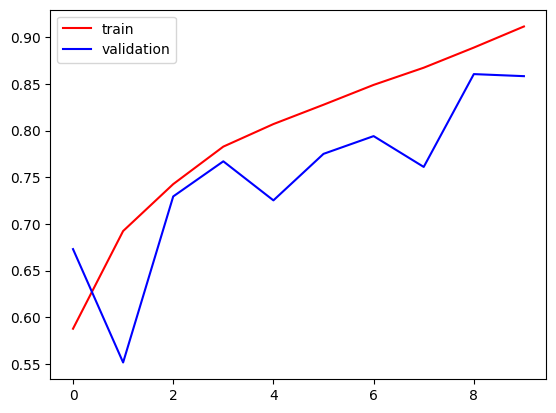

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="validation")
plt.legend()
plt.show()

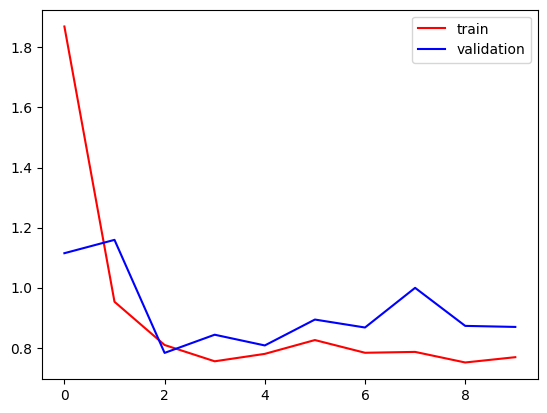

In [ ]:
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="validation")
plt.legend()
plt.show()

In [ ]:
#TRY TO IMPROVING AGAIN

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

cnn = sequential()

cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D((2, 2)))

# Conv Block 2
cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D((2, 2)))

# Conv Block 3
cnn.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D((2, 2)))

# Global pooling instead of Flatten
cnn.add(GlobalAveragePooling2D())

# Dense Layers
cnn.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(Dropout(0.3))
cnn.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(Dropout(0.3))
cnn.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# === Callbacks === #
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# === Train the Model === #
history = cnn.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=50,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 158ms/step - accuracy: 0.6056 - loss: 0.9051 - val_accuracy: 0.5556 - val_loss: 0.9193 - learning_rate: 1.0000e-04
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 149ms/step - accuracy: 0.6642 - loss: 0.8287 - val_accuracy: 0.6916 - val_loss: 0.7828 - learning_rate: 1.0000e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 153ms/step - accuracy: 0.6889 - loss: 0.7860 - val_accuracy: 0.6974 - val_loss: 0.7556 - learning_rate: 1.0000e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 147ms/step - accuracy: 0.7107 - loss: 0.7468 - val_accuracy: 0.7142 - val_loss: 0.7225 - learning_rate: 1.0000e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 146ms/step - accuracy: 0.7307 - loss: 0.7074 - val_accuracy: 0.7526 - val_loss: 0.6734 - learning_rate: 1.0000e-04
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 153ms/step - accuracy: 0.7413 - loss: 0.6751 - val_accuracy: 0.7376 - val_loss: 0.6790 - learning_rate: 1.0000e-04
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 13

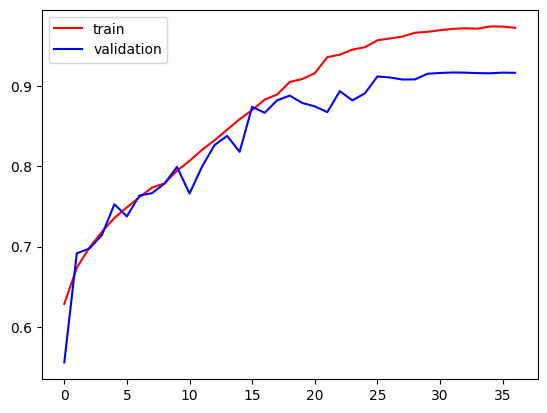

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="validation")
plt.legend()
plt.show()

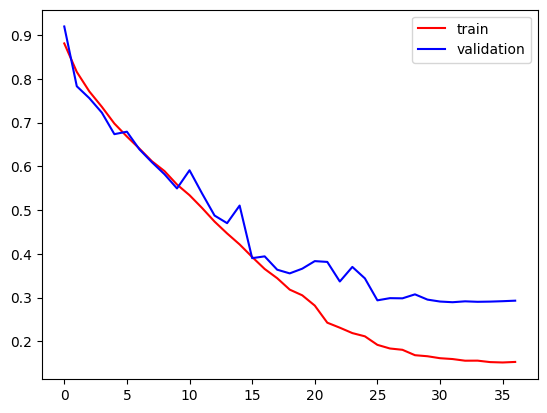

In [ ]:
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="validation")
plt.legend()
plt.show()